# DESKRIPSI PROYEK

menemukan lokasi yang cocok untuk penggalian sumur minyak baru.
Berikut adalah langkah-langkah untuk memilih lokasi baru:
1. Kumpulkan parameter untuk membangun sumur minyak di beberapa wilayah terpilih: kualitas minyak dan volume cadangan minyak;
2. Buatlah sebuah model yang mampu memprediksi volume cadangan minyak di sumur yang baru;
3. Pilihlah sumur minyak dengan nilai estimasi tertinggi;
4. Pilihlah wilayah dengan total laba tertinggi untuk sumur minyak terpilih.

Parameter setiap sumur minyak di tiga wilayah sudah diketahui.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Library" data-toc-modified-id="Library-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Library</a></span></li><li><span><a href="#Data-dan-Informasi-Umum" data-toc-modified-id="Data-dan-Informasi-Umum-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data dan Informasi Umum</a></span></li><li><span><a href="#df_1" data-toc-modified-id="df_1-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>df_1</a></span></li><li><span><a href="#df_2" data-toc-modified-id="df_2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>df_2</a></span></li><li><span><a href="#df_3" data-toc-modified-id="df_3-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>df_3</a></span></li><li><span><a href="#sebaran-product-setiap-dataframe" data-toc-modified-id="sebaran-product-setiap-dataframe-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>sebaran product setiap dataframe</a></span></li></ul></li><li><span><a href="#Latih-dan-uji-model-untuk-setiap-wilayah:" data-toc-modified-id="Latih-dan-uji-model-untuk-setiap-wilayah:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Latih dan uji model untuk setiap wilayah:</a></span><ul class="toc-item"><li><span><a href="#Model-dan-Data" data-toc-modified-id="Model-dan-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model dan Data</a></span></li></ul></li><li><span><a href="#Menghitung-Laba" data-toc-modified-id="Menghitung-Laba-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Menghitung Laba</a></span><ul class="toc-item"><li><span><a href="#Simpan-semua-nilai-kunci-untuk-perhitungan-laba-pada-variabel-variabel-terpisah." data-toc-modified-id="Simpan-semua-nilai-kunci-untuk-perhitungan-laba-pada-variabel-variabel-terpisah.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Simpan semua nilai kunci untuk perhitungan laba pada variabel-variabel terpisah.</a></span></li><li><span><a href="#pisahkan-200-volume-tertinggi" data-toc-modified-id="pisahkan-200-volume-tertinggi-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>pisahkan 200 volume tertinggi</a></span></li></ul></li><li><span><a href="#Buatlah-sebuah-fungsi-untuk-menghitung-laba-dari-kumpulan-sumur-minyak-terpilih-dan-prediksi-model:" data-toc-modified-id="Buatlah-sebuah-fungsi-untuk-menghitung-laba-dari-kumpulan-sumur-minyak-terpilih-dan-prediksi-model:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Buatlah sebuah fungsi untuk menghitung laba dari kumpulan sumur minyak terpilih dan prediksi model:</a></span></li><li><span><a href="#Hitunglah-risiko-dan-laba-untuk-setiap-wilayah:" data-toc-modified-id="Hitunglah-risiko-dan-laba-untuk-setiap-wilayah:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hitunglah risiko dan laba untuk setiap wilayah:</a></span></li></ul></div>

## EDA

### Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

### Data dan Informasi Umum

In [ ]:
path_1 = '/datasets/geo_data_0.csv'
path_2 = '/datasets/geo_data_1.csv'
path_3 = '/datasets/geo_data_2.csv'

df_1 = pd.read_csv(path_1)
df_2 = pd.read_csv(path_2)
df_3 = pd.read_csv(path_3)

### df_1

In [ ]:
df_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [ ]:
df_1.duplicated().sum()

0

### df_2

In [ ]:
df_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [ ]:
df_2.duplicated().sum()

0

### df_3

In [ ]:
df_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [ ]:
df_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [ ]:
df_3.duplicated().sum()

0

### sebaran product setiap dataframe

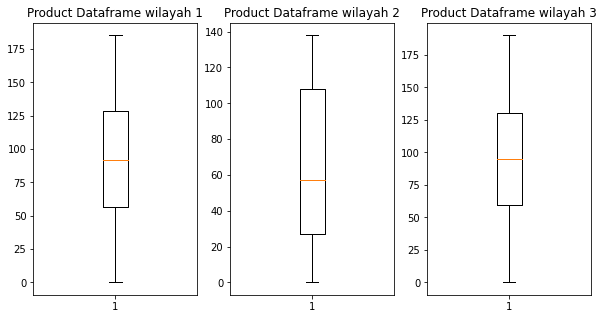

In [ ]:
plt.figure(figsize=(10,5),frameon=True)
plt.subplot(1,3,1)
plt.boxplot(df_1['product'])
plt.title('Product Dataframe wilayah 1')

plt.subplot(1,3,2)
plt.boxplot(df_2['product'])
plt.title('Product Dataframe wilayah 2')

plt.subplot(1,3,3)
plt.boxplot(df_3['product'])
plt.title('Product Dataframe wilayah 3')
plt.show()

Kesimpulan :

dari ketiga dataframe yang kita miliki sepertinya untuk EDA sudah bagus, tidak memiliki nilai yang hilang, tidak ada nilai duplikat, tipe data yang sudah sesuai. tetapi di ketiga dataframe memiliki beberapa id yang sama, walapun jumlah nya kecil dari keseluruhan dataframe. dan kita akan menghiraukan nya karna kurang nya informasi.

## Latih dan uji model untuk setiap wilayah:
    2.1. Pisahkan data menjadi training set dan validation set dengan rasio 75:25.
    2.2. Latih model Anda dan buatlah prediksi untuk validation set.
    2.3. Simpan prediksi dan jawaban yang benar untuk validation set.
    2.4. Tampilkan volume rata-rata cadangan minyak yang diprediksi dan model RMSE.
    2.5. Analisis hasilnya.

### Model dan Data

In [ ]:
df_all =[
    df_1.drop('id',axis=1),
    df_2.drop('id',axis=1),
    df_3.drop('id',axis=1)
]

In [ ]:
state = np.random.RandomState(2023)

In [ ]:
true_pred = []
true_target = []

for region in range(len(df_all)):
    data = df_all[region]

    features = data.drop('product',axis=1)
    target = data['product']

    features_train,features_valid, target_train,target_valid = train_test_split(features,target,
                                                                                test_size=0.25,
                                                                               random_state=state)
    model = LinearRegression()
    model.fit(features_train,target_train)
    prediction = model.predict(features_valid)

    true_target.append(target_valid.reset_index(drop=True))
    true_pred.append(pd.Series(prediction))

    mean_product_target = target.mean()
    mean_product_pred = prediction.mean()
    model_rmse = mean_squared_error(target_valid,prediction)**0.5

    print('region ', region)
    print('mean_product_target', mean_product_target)
    print('mean_product_pred', mean_product_pred)
    print('Model RMSE', model_rmse)

region  0
mean_product_target 92.50000000000001
mean_product_pred 92.65140015904608
Model RMSE 37.46914432848725
region  1
mean_product_target 68.82500000000002
mean_product_pred 68.72428808667091
Model RMSE 0.8897941970910579
region  2
mean_product_target 95.00000000000004
mean_product_pred 94.90259408361618
Model RMSE 40.00851788183789


Kesimpulan:

Region 0/df_1 dan Region 2/df_3 memiliki nilai rata rata yang tinggi, tetapi memiliki nilai RMSE yang tinggi juga, nilai RMSE yang tinggi membuat model memiliki keakuratan yang cukup rendah kedepan nya. berbanding terbalik dengan region1/df_2 yang memiliki nilai RMSE yang kecil yang membuat model lebih akurat. walaupun rata ratanya juga lebih kecil di banding wilayah lain.

## Menghitung Laba

Lakukan persiapan untuk menghitung laba:

    3.1. Simpan semua nilai kunci untuk perhitungan laba pada variabel-variabel terpisah.
    3.2. Hitung volume cadangan minyak yang mencukupi untuk mengembangkan sumur baru tanpa kerugian.Bandingkan nilai yang didapat dengan rata-rata volume cadangan minyak di setiap wilayah.
    3.3. Sajikan temuan-temuan Anda terkait persiapan untuk perhitungan laba.

### Simpan semua nilai kunci untuk perhitungan laba pada variabel-variabel terpisah.

In [ ]:
bootstrap =1000
best_point = 200
sample_reg = 500
budget_total = 100000000
budget_per_point = budget_total / 200
product_price = 4500

### pisahkan 200 volume tertinggi

In [ ]:
top_200_pred_1 = true_pred[0].sort_values(ascending=False)[:200]
top_200_pred_2 = true_pred[1].sort_values(ascending=False)[:200]
top_200_pred_3 = true_pred[2].sort_values(ascending=False)[:200]

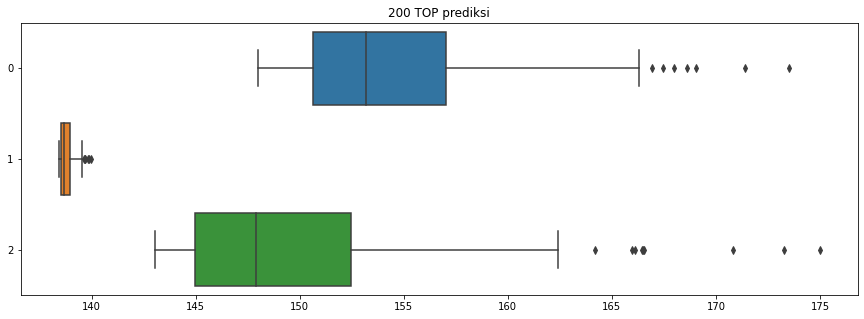

In [ ]:
plt.figure(figsize=(15,5),frameon=True)
sns.boxplot(data=[top_200_pred_1,top_200_pred_2,top_200_pred_3],orient='h')
plt.title('200 TOP prediksi')
plt.show()

Kesimpulan
top_200_pred_2 menjadi wilayah yang memiliki nilai terendah, dan  top_200_pred_3 memiliki satu hasil tertinggi tetapi masih memiliki nilai rata rata di bawah top_200_pred_1


## Buatlah sebuah fungsi untuk menghitung laba dari kumpulan sumur minyak terpilih dan prediksi model:

4.1. Pilihlah sumur dengan nilai prediksi tertinggi.

4.2. Rangkumlah target volume cadangan minyak berdasarkan prediksi-prediksi tersebut

4.3. Usulkan suatu wilayah untuk pengembangan sumur minyak dan berikan justifikasi atau alasan atas pilihan Anda. Hitunglah laba untuk volume cadangan minyak yang diperoleh.

In [ ]:
def predictions_profit(data, region, income=4500, total_cost=100000000, points=200):
    prediction = data[region]
    predict_top200 = prediction.sort_values(ascending=False)[:points]
    product = predict_top200.sum()
    total_cost = round(total_cost / 1000000)
    total_income = round(income * product / 1000000)
    profit = round(total_income - total_cost)
    print('------------------------------')
    print(f'Profitability Geo Data {region}')
    print(f'Total Income: {total_income}')
    print(f'Total Cost  : {total_cost}')
    print(f'Profit      : {profit}', 'M USD')


In [ ]:
predictions_profit(true_pred,0)

------------------------------
Profitability Geo Data 0
Total Income: 139
Total Cost  : 100
Profit      : 39 M USD


In [ ]:
predictions_profit(true_pred,1)

------------------------------
Profitability Geo Data 1
Total Income: 125
Total Cost  : 100
Profit      : 25 M USD


In [ ]:
predictions_profit(true_pred,2)

------------------------------
Profitability Geo Data 2
Total Income: 135
Total Cost  : 100
Profit      : 35 M USD


In [ ]:
def target_profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:best_point]
    product = selected_points.sum()
    revenue = product * product_price
    cost = budget_total
    profit = revenue - cost
    return profit

In [ ]:
target_profit(true_target[0],true_pred[0]) / 1000000

33.20769504340322

In [ ]:
target_profit(true_target[1],true_pred[1]) / 1000000

24.150866966815116

In [ ]:
target_profit(true_target[2],true_pred[2]) / 1000000

24.10572278900899

Kesimpulan

kita melakukan perhitungan di 2 metode, perhitungan dengan hasil prediksi dan juga dengan hasil target. di dapat hasil df_1 prediksi mendaptkan profit terbesar senilai 39 M USD.

## Hitunglah risiko dan laba untuk setiap wilayah:
5.1. Gunakan teknik bootstrapping dengan 1.000 sampel untuk menemukan distribusi labanya.

5.2. Temukan keuntungan rata-rata, selang kepercayaan 95%, dan risiko kerugian. Kerugian adalah laba yang
bersifat negatif, hitunglah probabilitas kerugian yang mungkin dialami dan nyatakan sebagai persentase.

5.3. Sajikan temuan Anda: sarankan suatu wilayah untuk pengembangan sumur minyak dan sertakan pembenaran atau alasan atas pilihan Anda.

In [ ]:
def profit_bootstrap(prediction,name,income=4500, total_cost = 100000000, points=200):
    predict_top200 = prediction.sort_values(ascending=False)[:best_point]
    product = predict_top200.sum()
    total_cost = total_cost
    total_income = income * product
    profit = total_income - total_cost

    return profit

In [ ]:
def profit(target,predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:best_point]
    product = selected_points.sum()
    revenue = product * product_price
    cost = budget_total
    profit = revenue - cost
    return profit

In [ ]:
for region in range(3):
    target= true_target[region]
    predictions = true_pred[region]

    profit_values = []

    for i in range(bootstrap):
        target_sample = target.sample(sample_reg,replace=True,random_state=state)
        predictions_sample = predictions[target_sample.index]
        profit_values.append(profit_bootstrap(prediction=predictions_sample,name=region))

    profit_values =pd.Series(profit_values)

    mean_profit = profit_values.mean()
    confidence_interval = (profit_values.quantile(0.025),profit_values.quantile(0.975))
    negative_profit_chance = (profit_values < 0).mean()

    print('Region', region)
    print('Mean profit =', mean_profit,'USD')
    print('95% confidence interval:', confidence_interval)
    print('Risk of Losses =', negative_profit_chance * 100,'%')
    print()

Region 0
Mean profit = 3542558.5444905614 USD
95% confidence interval: (1396267.2285845135, 5767647.036305424)
Risk of Losses = 0.1 %

Region 1
Mean profit = 4286560.174702445 USD
95% confidence interval: (180967.4411560815, 8294321.044156265)
Risk of Losses = 1.7999999999999998 %

Region 2
Mean profit = 2920694.6721297516 USD
95% confidence interval: (964955.5411613353, 5048082.523179846)
Risk of Losses = 0.1 %



In [ ]:
for region in range(3):
    target= true_target[region]
    predictions = true_pred[region]

    profit_values = []

    for i in range(bootstrap):
        target_sample = target.sample(sample_reg,replace=True,random_state=state)
        predictions_sample = predictions[target_sample.index]
        profit_values.append(profit(target_sample,predictions_sample))

    profit_values =pd.Series(profit_values)

    mean_profit = profit_values.mean()
    confidence_interval = (profit_values.quantile(0.025),profit_values.quantile(0.975))
    negative_profit_chance = (profit_values < 0).mean()

    print('Region', region)
    print('Mean profit =', mean_profit,'USD')
    print('95% confidence interval:', confidence_interval)
    print('Risk of Losses =', negative_profit_chance * 100,'%')
    print()

Region 0
Mean profit = 4125326.2058005207 USD
95% confidence interval: (-993939.6413652096, 9483832.16553155)
Risk of Losses = 6.4 %

Region 1
Mean profit = 4931186.321373789 USD
95% confidence interval: (852240.0650973123, 9273459.925277865)
Risk of Losses = 0.8999999999999999 %

Region 2
Mean profit = 3532062.2792460565 USD
95% confidence interval: (-2274221.196195366, 8891178.600249948)
Risk of Losses = 10.8 %



**KESIMPULAN**

ketika di lakukan nya perhitungan laba terhada ketiga wilayah/data yang dimiliki, hasil menunjukan bahwa df_1 memiliki hasil profit terbesar, tetapi setelah dilakukan Bootstrap 1000x terhadap 3 wilayah, didapat hasil df_2 atau Region1 memiliki rata rata Profit yang tinggi dengan menawarkan Risk of Losses rendah.

hasil tersebut menunjukan Bahwa wilayah df_2 memiliki peluang terbesar dan stabil memberikan Profit untuk dilakukan nya penggalian sumur minyak baru.